In [23]:
import pandas as pd

In [24]:
# Read the CSV file
df = pd.read_csv('C:/xampp/htdocs/git/MobilePhonePricePrediction/Data/Raw/Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [25]:
# Dropping the 'Product_id' column as it is not needed for analysis
df.drop(columns=['Product_id'], inplace=True)



In [26]:
df.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [27]:
# Renaming the 'resoloution' column to 'resolution' for consistency
df.rename(columns={'resoloution': 'resolution'}, inplace=True)

df.rename(columns={'RearCam': 'Rear_Cam'}, inplace=True)


In [28]:
df.head()

,Price,Sale,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,Rear_Cam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [29]:
# Convert all column names to snake_case
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()


,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [30]:
# Checking null values
print(df.isnull().sum())


price           0
sale            0
weight          0
resolution      0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
rear_cam        0
front_cam       0
battery         0
thickness       0
dtype: int64


In [31]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


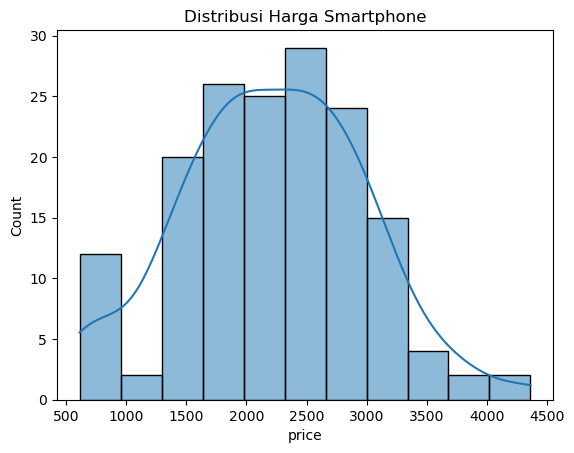

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], kde=True)
plt.title('Distribusi Harga Smartphone')
plt.show()

In [33]:
def price_category(price):
    if price < 1700:
        return 'Low'
    elif price < 2700:
        return 'Mid'
    else:
        return 'High'

df['price_range'] = df['price'].apply(price_category)

df['price_range'].value_counts()


price_range
Mid     78
High    45
Low     38
Name: count, dtype: int64

In [34]:
thresholds = {
    'ram': {
        'low_max': 2,         # max RAM untuk low-end
        'mid_max': 4,         # max RAM untuk mid-tier
        'high_min': 6         # min RAM flagship modern
    },
    'battery': {
        'low_max': 2000,      
        'mid_max': 3500,
        'high_min': 4000
    },
    'cpu_core': {
        'low_max': 4,
        'mid_max': 8,
        'high_min': 8         # flagship biasanya 8–12 core
    },
    'cpu_freq': {
        'low_max': 1.5,
        'mid_max': 2.5,
        'high_min': 2.5
    },
    'ppi': {
        'low_max': 300,
        'mid_max': 450,
        'high_min': 450
    },
    'internal_mem': {
        'low_max': 16,
        'mid_max': 64,
        'high_min': 128
    },
    'rear_cam': {
        'low_max': 8,
        'mid_max': 16,
        'high_min': 32
    }
}


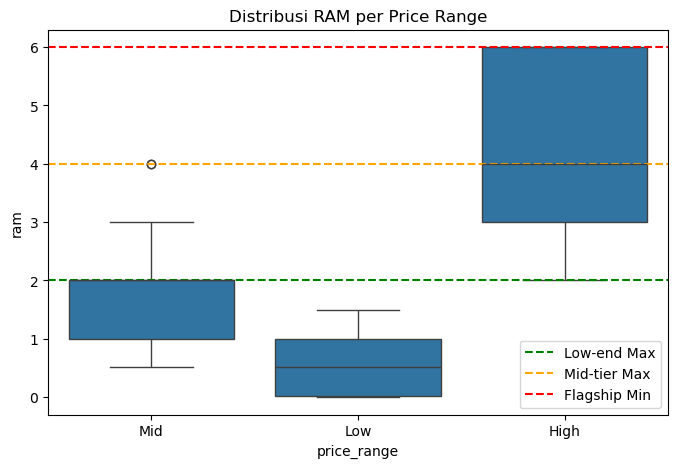

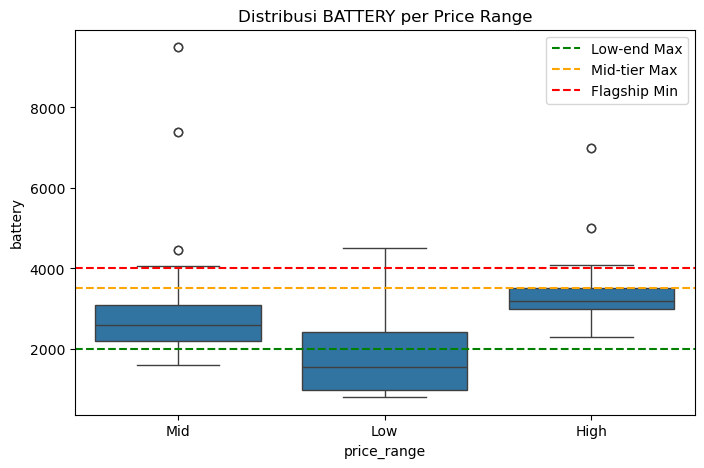

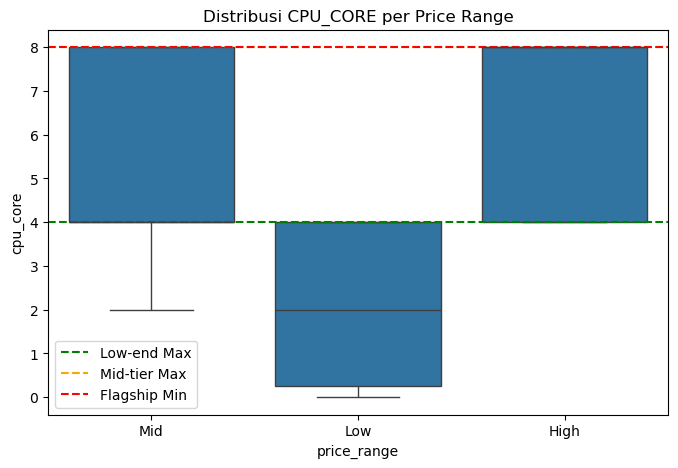

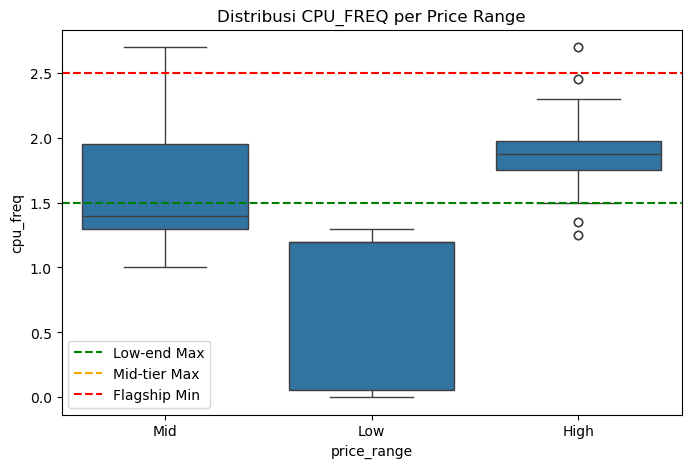

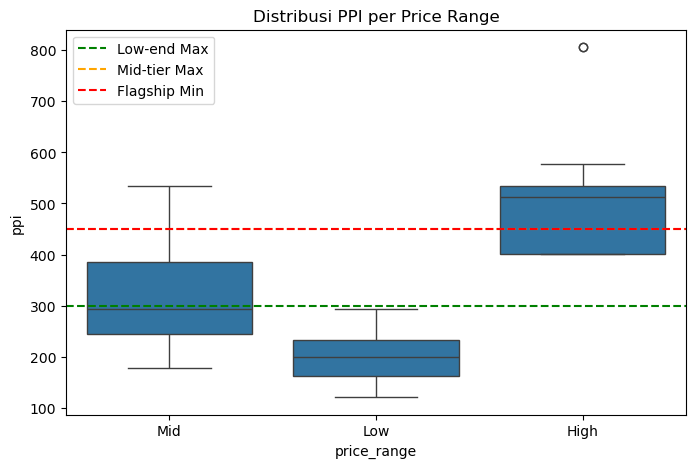

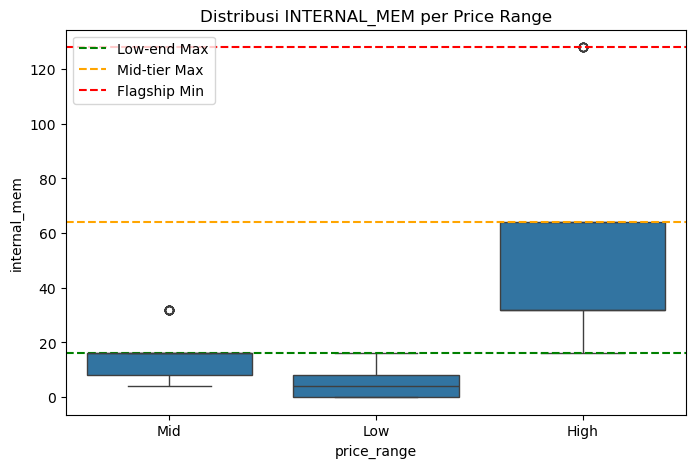

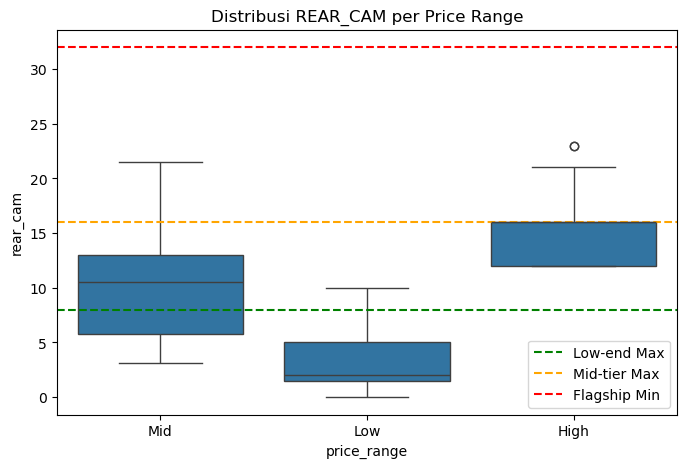

In [35]:
def plot_feature_with_threshold(feature):
    plt.figure(figsize=(8,5))
    sns.boxplot(x='price_range', y=feature, data=df)
    plt.title(f'Distribusi {feature.upper()} per Price Range')

    # Tarik garis threshold tiap tier
    plt.axhline(thresholds[feature]['low_max'], color='green', linestyle='--', label='Low-end Max')
    plt.axhline(thresholds[feature]['mid_max'], color='orange', linestyle='--', label='Mid-tier Max')
    plt.axhline(thresholds[feature]['high_min'], color='red', linestyle='--', label='Flagship Min')

    plt.legend()
    plt.show()

plot_feature_with_threshold('ram')
plot_feature_with_threshold('battery')
plot_feature_with_threshold('cpu_core')
plot_feature_with_threshold('cpu_freq')
plot_feature_with_threshold('ppi')
plot_feature_with_threshold('internal_mem')
plot_feature_with_threshold('rear_cam')

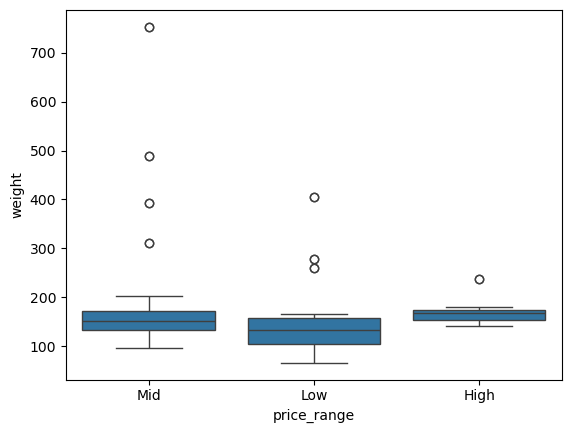

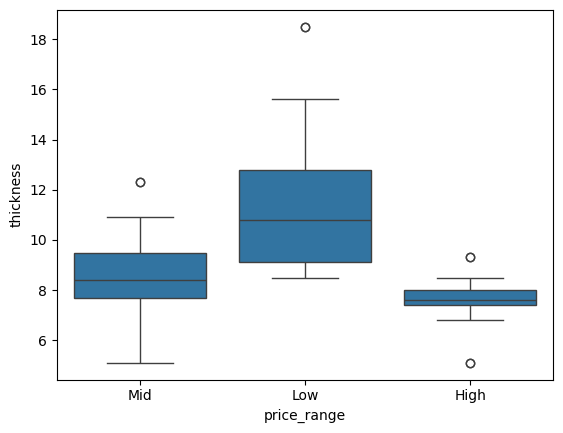

In [ ]:
# Visualisation of weight and thickness by price range
sns.boxplot(x='price_range', y='weight', data=df)
plt.show()

sns.boxplot(x='price_range', y='thickness', data=df)
plt.show()


In [37]:
# Because weight and thickness are not that relevant, we can drop them
df.drop(columns=['weight', 'thickness'], inplace=True)
df.head()

,price,sale,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,price_range
0,2357,10,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,Mid
1,1749,10,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,Mid
2,1916,10,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,Mid
3,1315,11,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,Low
4,1749,11,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,Mid
